# Task

Apply preprocessing methods on a dataset of our choice. 

The chosen dataset is Udemy Courses from https://www.kaggle.com/andrewmvd/udemy-courses

In [160]:
# Import libraries/modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [161]:
df = pd.read_csv('udemy_courses.csv')
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [162]:
# Before any transformations are made to the data, I will make a copy of the dataframe. 

df_1 = df.copy()

In [163]:
# Check the dataset for missing values

df_1.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

There are no null values present in the dataset. 

In [164]:
# Remove the duplicates from the dataset

df_1.drop_duplicates(subset=['course_id'])

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [165]:
# If I were interested in seeing the trend in published courses by subject throughout the years,
# I would only need the year of publishing for this purpose. 
# I will derive a new column from the 'published_timestamp' column to show only the year.  

df_1['year'] = df['published_timestamp'].apply(lambda x: int(x[:4]))
df_1

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development,2016
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development,2017
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development,2015
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development,2016


In [166]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
 12  year                 3678 non-null   int64  
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 348.5+ KB


In [167]:
# If I were to use this dataset to train a prediction model, for example, to 
# predict the number of subscribers of a newly published course, 
# I will need to convert all the categorical values to numerical values. 

In [168]:
# Before moving on to any transformations, I will firt remove the columns 
# that are not important for the prediction model. 

df_1.drop(columns=['course_id', 'course_title', 'url', 'published_timestamp', 'year'], inplace=True)
df_1.head()

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,True,200,2147,23,51,All Levels,1.5,Business Finance
1,True,75,2792,923,274,All Levels,39.0,Business Finance
2,True,45,2174,74,51,Intermediate Level,2.5,Business Finance
3,True,95,2451,11,36,All Levels,3.0,Business Finance
4,True,200,1276,45,26,Intermediate Level,2.0,Business Finance


## Converting categorical values into numerical values. 

In [169]:
# Change 'is_paid' column to 'float64' dtype

df_1['is_paid'] = df_1['is_paid'].astype(dtype='int64')

In [170]:
# List unique values in the 'level' column

df_1.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [171]:
# 'level' can be considered an ordinal feature. 
# We can replace the labels with numerical values that indicate 
# effort/complexity level (1 - least complex, 4 - most complex). 

level_mapping = {'Beginner Level': 1,
                'Intermediate Level': 2,
                'Expert Level': 3,
                'All Levels' : 4}

df_1['level'] = df_1['level'].map(level_mapping)
df_1.head()

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,1,200,2147,23,51,4,1.5,Business Finance
1,1,75,2792,923,274,4,39.0,Business Finance
2,1,45,2174,74,51,2,2.5,Business Finance
3,1,95,2451,11,36,4,3.0,Business Finance
4,1,200,1276,45,26,2,2.0,Business Finance


In [172]:
# This dataset will be used to train a ML model in order to 
# predict the number of subscribers that a newly published 
# course will have. 

# One of the features in the model will be the course subject. 
# Because the 'subject' is a categorical attribute, I need to convert 
# the categorical values to numerical values.
# I can do this using One-Hot-Encoding.

ohe = OneHotEncoder()
ohe.fit(df_1.loc[:, ['subject']])

OneHotEncoder()

In [173]:
# New columns

ohe.get_feature_names()

array(['x0_Business Finance', 'x0_Graphic Design',
       'x0_Musical Instruments', 'x0_Web Development'], dtype=object)

In [174]:
# Apply the OneHotEncoder to the dataframe

df_enc = pd.DataFrame(ohe.transform(df_1.loc[:, ['subject']]).toarray(), columns=ohe.get_feature_names())
df_enc

,x0_Business Finance,x0_Graphic Design,x0_Musical Instruments,x0_Web Development
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
3673,0.0,0.0,0.0,1.0
3674,0.0,0.0,0.0,1.0
3675,0.0,0.0,0.0,1.0
3676,0.0,0.0,0.0,1.0


In [175]:
df_1 = pd.concat([df_1.drop(['subject'], axis=1), df_enc], axis=1)
df_1

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,x0_Business Finance,x0_Graphic Design,x0_Musical Instruments,x0_Web Development
0,1,200,2147,23,51,4,1.5,1.0,0.0,0.0,0.0
1,1,75,2792,923,274,4,39.0,1.0,0.0,0.0,0.0
2,1,45,2174,74,51,2,2.5,1.0,0.0,0.0,0.0
3,1,95,2451,11,36,4,3.0,1.0,0.0,0.0,0.0
4,1,200,1276,45,26,2,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3673,1,100,1040,14,21,4,2.0,0.0,0.0,0.0,1.0
3674,1,25,306,3,42,1,3.5,0.0,0.0,0.0,1.0
3675,1,40,513,169,48,4,3.5,0.0,0.0,0.0,1.0
3676,1,50,300,31,38,4,3.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

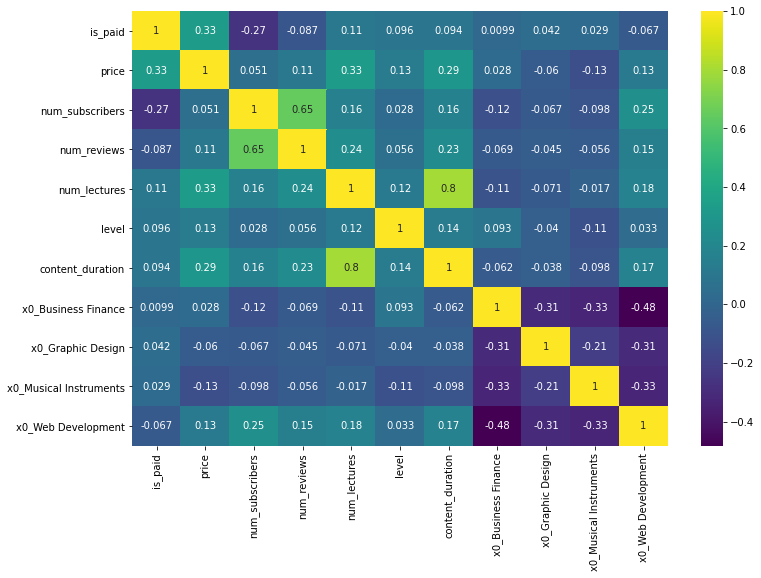

In [176]:
# Look into the correlatios between all the numerical attributes

plt.figure(figsize=(12,8))
sns.heatmap(df_1.corr(),cmap='viridis',annot=True)

Notes: 

-The strongest correlation exists between the variables: 'num_lectures' and 'content_duration', and 'num_subscribers' and 'num_reviews'.

-There is a positive correlation between the price of the course and the number of lectures and the course duration. 
This means that the price is higher if there are more lectures, or if the course lasts longer.

-There is a negative correlation between the variables 'num_subscribers' and 'is_paid'. This means that free courses (is_paid = 0) attract more subscribers. 

<AxesSubplot:ylabel='Count'>

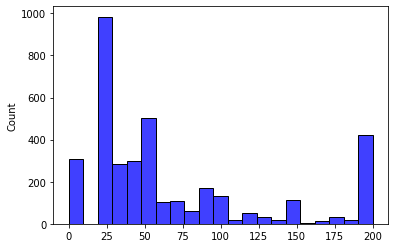

In [184]:
# Investigating the distribution of 'price'

x = df_1['price'].values
sns.histplot(x, color = 'blue')

In [181]:
# (Only for the sake of the exercise)

# Check to see if I can improve the correlation between price and number of subscribers
# Binning the variable 'price'

df_1['price_1'] = 0
df_1.loc[df_1['price'] <= 25, 'price_1'] = 25
df_1.loc[(df_1['price'] > 25) & (df_1['price'] <= 75), 'price_1'] = 75
df_1.loc[(df_1['price'] > 75) & (df_1['price'] <= 150), 'price_1'] = 150
df_1.loc[df_1['price'] > 150, 'price_1'] = 200 

In [182]:
df_1.head()

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,x0_Business Finance,x0_Graphic Design,x0_Musical Instruments,x0_Web Development,price_1
0,1,200,2147,23,51,4,1.5,1.0,0.0,0.0,0.0,200
1,1,75,2792,923,274,4,39.0,1.0,0.0,0.0,0.0,75
2,1,45,2174,74,51,2,2.5,1.0,0.0,0.0,0.0,75
3,1,95,2451,11,36,4,3.0,1.0,0.0,0.0,0.0,150
4,1,200,1276,45,26,2,2.0,1.0,0.0,0.0,0.0,200


<AxesSubplot:>

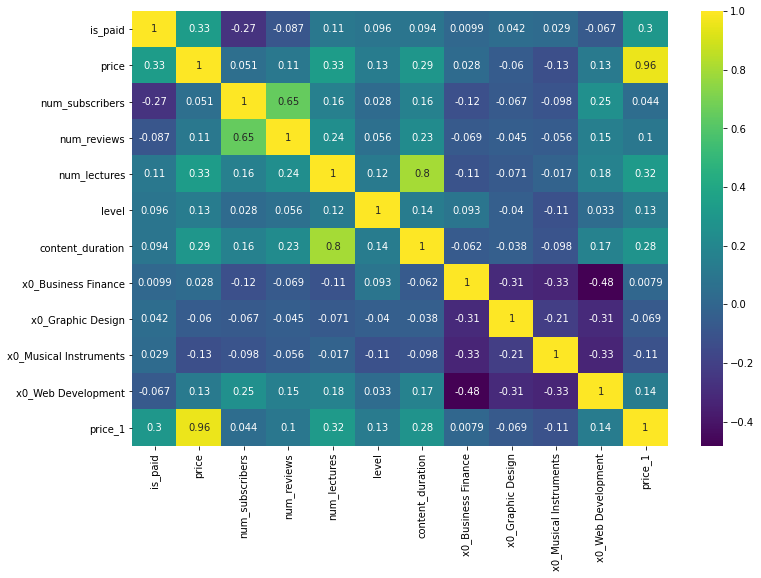

In [183]:
# Look into the correlatios between all the numerical attributes with the new price column included

plt.figure(figsize=(12,8))
sns.heatmap(df_1.corr(),cmap='viridis',annot=True)

The correlation did not improve.

In [180]:
df_1.drop(columns=['price_1'], inplace=True)